In [34]:
import pandas as pd 
import numpy as np
import os

In [35]:

file_names = os.listdir('../data2/Anio2014/')
file_names

['abr_mo14.csv',
 'ago_mo14.csv',
 'dic_mo14.csv',
 'ene_mo14.csv',
 'feb_mo14.csv',
 'jul_mo14.csv',
 'jun_mo14.csv',
 'mar_mo14.csv',
 'may_mo14.csv',
 'nov_mo14.csv',
 'oct_mo14.csv',
 'sep_mo14.csv']

In [36]:
df_aire = pd.DataFrame()
for file_name in file_names:
    df_current = pd.read_csv('../data2/Anio2014/' + file_name, delimiter=';')
    print(file_name, df_current.shape)
    df_aire = pd.concat([df_aire, df_current], ignore_index=True)

abr_mo14.csv (4530, 56)
ago_mo14.csv (4567, 56)
dic_mo14.csv (4645, 56)
ene_mo14.csv (4681, 56)
feb_mo14.csv (4228, 56)
jul_mo14.csv (4578, 56)
jun_mo14.csv (4440, 56)
mar_mo14.csv (4614, 56)
may_mo14.csv (4614, 56)
nov_mo14.csv (4530, 56)
oct_mo14.csv (4623, 56)
sep_mo14.csv (4440, 56)


In [37]:
# 3. Filtrar por datos NO2
df_aire = df_aire[(df_aire['MAGNITUD'] == 8)]
df_aire.head()
df_aire.tail()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
54395,28,79,60,8,28079060_8_8,2014,9,26,11.0,V,...,30.0,V,60.0,V,78.0,V,95.0,V,86.0,V
54396,28,79,60,8,28079060_8_8,2014,9,27,66.0,V,...,23.0,V,22.0,V,22.0,V,17.0,V,12.0,V
54397,28,79,60,8,28079060_8_8,2014,9,28,11.0,V,...,13.0,V,29.0,V,43.0,V,55.0,V,34.0,V
54398,28,79,60,8,28079060_8_8,2014,9,29,54.0,V,...,39.0,V,50.0,V,61.0,V,73.0,V,61.0,V
54399,28,79,60,8,28079060_8_8,2014,9,30,39.0,V,...,32.0,V,62.0,V,73.0,V,95.0,V,25.0,V


In [38]:
df_aire['fecha'] = pd.to_datetime(df_aire[['ANO','MES','DIA']].rename(columns = {'ANO': 'YEAR', 'MES': 'MONTH', 'DIA': 'DAY'}))

In [39]:
# 4. Extraer datos de las medidas tomadas y creamos un nuevo dataframe 'data' con el formato que nosotros queremos
data_columns = [ 'H01', 'H02', 'H03', 'H04', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24'] # feature
veri_columns = [ 'V01', 'V02', 'V03', 'V04', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24']

hora_column = np.arange(1,25) # feature label

data = pd.DataFrame(columns=['ano', 'mes', 'dia', 'hora', 'dato', 'verificado', 'estacion']) # DataFrame con datos finales
aux = pd.DataFrame(columns=['ano', 'mes', 'dia', 'hora', 'dato', 'verificado', 'estacion']) # aux de próxima fila a ser añadida

# para cada hora de cada fila, crea una nueva fila con su dato y su valor de verificado
for  (h,d,v) in zip(hora_column, data_columns, veri_columns): 
     aux['dato'] = df_aire [ data_columns[h-1] ] 
     aux['verificado'] = df_aire [ veri_columns[h-1] ] 
     aux['hora'] = h-1
     aux[['ano', 'mes', 'dia']] = df_aire[['ANO','MES','DIA']]
     aux['estacion'] = df_aire ['ESTACION']
     data = data.append(aux, sort = False, ignore_index = True)

data = data.astype({'hora': 'int32'}, copy = False)

data.head(10)

C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\2561734580.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(aux, sort = False, ignore_index = True)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\2561734580.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(aux, sort = False, ignore_index = True)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\2561734580.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(aux, sort = False, ignore_index = True)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\2561734580.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(

,ano,mes,dia,hora,dato,verificado,estacion
0,2014,4,1,0,65.0,V,4
1,2014,4,2,0,22.0,V,4
2,2014,4,3,0,55.0,V,4
3,2014,4,4,0,22.0,V,4
4,2014,4,5,0,11.0,V,4
5,2014,4,6,0,52.0,V,4
6,2014,4,7,0,62.0,V,4
7,2014,4,8,0,64.0,V,4
8,2014,4,9,0,69.0,V,4
9,2014,4,10,0,53.0,V,4


In [40]:
# Añadimos columna fecha de formato datetime
data['fecha'] = pd.to_datetime(data[['ano','mes','dia','hora']]
                                                            .rename(columns = {'ano': 'year', 'mes': 'month',
                                                                              'dia': 'day', 'hora': 'hour'}))

In [41]:
data

,ano,mes,dia,hora,dato,verificado,estacion,fecha
0,2014,4,1,0,65.0,V,4,2014-04-01 00:00:00
1,2014,4,2,0,22.0,V,4,2014-04-02 00:00:00
2,2014,4,3,0,55.0,V,4,2014-04-03 00:00:00
3,2014,4,4,0,22.0,V,4,2014-04-04 00:00:00
4,2014,4,5,0,11.0,V,4,2014-04-05 00:00:00
...,...,...,...,...,...,...,...,...
209995,2014,9,26,23,86.0,V,60,2014-09-26 23:00:00
209996,2014,9,27,23,12.0,V,60,2014-09-27 23:00:00
209997,2014,9,28,23,34.0,V,60,2014-09-28 23:00:00
209998,2014,9,29,23,61.0,V,60,2014-09-29 23:00:00


In [42]:
# Multi-index data frame con estacion y fecha :O
data.set_index(['estacion', 'fecha'], inplace=True)

In [43]:
# Usamos fecha como indice para cada estacion
#data.set_index(['fecha'], inplace=True)

In [44]:
# Ordnamos por estacion y luego por fecha (aprovechando el nuevo index)
data = data.sort_values(['estacion', 'fecha'])
data

ano mes dia  hora   dato verificado
estacion fecha                                                    
4        2014-01-01 00:00:00  2014   1   1     0   14.0          V
         2014-01-01 01:00:00  2014   1   1     1   38.0          V
         2014-01-01 02:00:00  2014   1   1     2   46.0          V
         2014-01-01 03:00:00  2014   1   1     3   32.0          V
         2014-01-01 04:00:00  2014   1   1     4   20.0          V
...                            ...  ..  ..   ...    ...        ...
60       2014-12-31 19:00:00  2014  12  31    19  103.0          V
         2014-12-31 20:00:00  2014  12  31    20  100.0          V
         2014-12-31 21:00:00  2014  12  31    21  105.0          V
         2014-12-31 22:00:00  2014  12  31    22  103.0          V
         2014-12-31 23:00:00  2014  12  31    23  103.0          V

[210000 rows x 6 columns]

In [45]:
# Para cada estación, rellenamos con NaN si hay alguna fila perdida y guardamos el resultado en un nuevo dataframe que ya debería tener todas las filas
#estaciones = data['estacion'].unique()
estaciones = data.index.get_level_values('estacion').unique()
datetime_index = pd.date_range(start='2/1/2019', end='5/31/2019 23:00:00', freq='H', name='fecha')
data_nuevo = pd.DataFrame()
for estacion in estaciones:
    #data_estacion = data[data['estacion'] == estacion]
    data_estacion = data.loc[estacion]
    print(estacion, len(data_estacion))
    data_estacion = data_estacion.reindex(datetime_index)
    data_estacion.reset_index(inplace=True)
    print(estacion, len(data_estacion))
    data_estacion['estacion'] = estacion
    data_nuevo = data_nuevo.append(data_estacion)
    
print(len(data_nuevo))

4 8760
4 2880
8 8736
8 2880
11 8760
11 2880
16 8760
16 2880
17 8760
17 2880
18 8688
18 2880
24 8760
24 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emm

27 8760
27 2880
35 8760
35 2880
36 8760
36 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


38 8760
38 2880
39 8760
39 2880
40 8760
40 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


47 8760
47 2880
48 8760
48 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


49 8760
49 2880
50 8760
50 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


54 8760
54 2880
55 8760
55 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


56 8616
56 2880
57 8760
57 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


58 8760
58 2880
59 8760
59 2880


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)
C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


60 8760
60 2880
69120


C:\Users\Emma\AppData\Local\Temp\ipykernel_1656\4050161805.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_nuevo = data_nuevo.append(data_estacion)


In [46]:
# Multi-index data frame con estacion y fecha :O
data_nuevo.set_index(['estacion', 'fecha'], inplace=True)

In [47]:
# Actualizamos data con el nuevo df:
data = data_nuevo
data.info()
data

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69120 entries, (4, Timestamp('2019-02-01 00:00:00')) to (60, Timestamp('2019-05-31 23:00:00'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ano         0 non-null      object 
 1   mes         0 non-null      object 
 2   dia         0 non-null      object 
 3   hora        0 non-null      float64
 4   dato        0 non-null      float64
 5   verificado  0 non-null      object 
dtypes: float64(2), object(4)
memory usage: 3.4+ MB


ano  mes  dia  hora  dato verificado
estacion fecha                                                    
4        2019-02-01 00:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 01:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 02:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 03:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 04:00:00  NaN  NaN  NaN   NaN   NaN        NaN
...                           ...  ...  ...   ...   ...        ...
60       2019-05-31 19:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 20:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 21:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 22:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 23:00:00  NaN  NaN  NaN   NaN   NaN        NaN

[69120 rows x 6 columns]

In [48]:
# Mostramos los datos que se habían perdidos
missing_data = data[data['dato'].isna()]
print(f'Cantidad de datos no existentes (perdidos): {len(missing_data)}')
missing_data

Cantidad de datos no existentes (perdidos): 69120


ano  mes  dia  hora  dato verificado
estacion fecha                                                    
4        2019-02-01 00:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 01:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 02:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 03:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 04:00:00  NaN  NaN  NaN   NaN   NaN        NaN
...                           ...  ...  ...   ...   ...        ...
60       2019-05-31 19:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 20:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 21:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 22:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 23:00:00  NaN  NaN  NaN   NaN   NaN        NaN

[69120 rows x 6 columns]

In [49]:
# # Rellenamos las columnas conciernientes a la fecha que faltan en esos datos perdidos excepto la columna 'dato' que ya trataremos más adelante
# dt = missing_data.index.get_level_values('fecha')
# data.loc[data['dato'].isna(),'ano'] = dt.year
# data.loc[data['dato'].isna(),'mes'] = dt.month
# data.loc[data['dato'].isna(),'dia'] = dt.day
# data.loc[data['dato'].isna(),'hora'] = dt.hour
# data = data.astype({'hora': 'int32'}, copy = False)

# #data.loc[data['dato'].isna(),['ano', 'mes', 'dia', 'hora']] = [dt.year, dt.month, dt.day, dt.hour]
# data[data['dato'].isna()]

In [50]:
# 6. Por último, marcamos los datos no verificados como NaN
no_verificados = data.loc[data['verificado'] != 'V']
print(f'Cantidad de datos existentes pero no válidos:{len(no_verificados)}')
data.loc[data['verificado'] != 'V', ['dato']] = np.nan
data.loc[data['verificado'] != 'V']

Cantidad de datos existentes pero no válidos:69120


ano  mes  dia  hora  dato verificado
estacion fecha                                                    
4        2019-02-01 00:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 01:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 02:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 03:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-02-01 04:00:00  NaN  NaN  NaN   NaN   NaN        NaN
...                           ...  ...  ...   ...   ...        ...
60       2019-05-31 19:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 20:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 21:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 22:00:00  NaN  NaN  NaN   NaN   NaN        NaN
         2019-05-31 23:00:00  NaN  NaN  NaN   NaN   NaN        NaN

[69120 rows x 6 columns]

In [51]:
# borramos columna verificado
del data['verificado']
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 69120 entries, (4, Timestamp('2019-02-01 00:00:00')) to (60, Timestamp('2019-05-31 23:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ano     0 non-null      object 
 1   mes     0 non-null      object 
 2   dia     0 non-null      object 
 3   hora    0 non-null      float64
 4   dato    0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 2.9+ MB


In [52]:
# Primero de todo, deshacemos el multíndice
data.reset_index(inplace=True) # Salvar los datos sin indices de estacion y fecha

In [53]:
# 7. Añadimos columna para el día de la semana
#dates = data.index.get_level_values('fecha').to_pydatetime() # con multiindex
dates = data['fecha'].dt.to_pydatetime() # con column y sin multiindex
days_of_week = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
data['dia_semana'] = np.array([days_of_week[d.weekday()] for d in dates])

In [54]:
data = data.rename(columns={'dato': 'NO2'}, copy = False)

In [55]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69120 entries, 0 to 69119
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   estacion    69120 non-null  int64         
 1   fecha       69120 non-null  datetime64[ns]
 2   ano         0 non-null      object        
 3   mes         0 non-null      object        
 4   dia         0 non-null      object        
 5   hora        0 non-null      float64       
 6   NO2         0 non-null      float64       
 7   dia_semana  69120 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.2+ MB


,estacion,fecha,ano,mes,dia,hora,NO2,dia_semana
0,4,2019-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
1,4,2019-02-01 01:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
2,4,2019-02-01 02:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
3,4,2019-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
4,4,2019-02-01 04:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
...,...,...,...,...,...,...,...,...
69115,60,2019-05-31 19:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
69116,60,2019-05-31 20:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
69117,60,2019-05-31 21:00:00,NaN,NaN,NaN,NaN,NaN,Viernes
69118,60,2019-05-31 22:00:00,NaN,NaN,NaN,NaN,NaN,Viernes


In [56]:
# Serie con solamente los datos de contaminación
datos = data['NO2']

In [57]:
# Número de datos no válidos
len(datos[datos.isnull()])

69120

In [58]:
datos.to_csv('pre_24est-feb-may_2019.csv') # Salvado serie solo datos históricos
data.to_csv('pre_24est-feb-may_2019+date.csv') # Salvado con los datos de las fechas

In [59]:
data_estacion = data[data['estacion'] == 4].copy(deep=True)
datos_estacion = data_estacion['NO2'].values

NameError: name 'days_month' is not defined

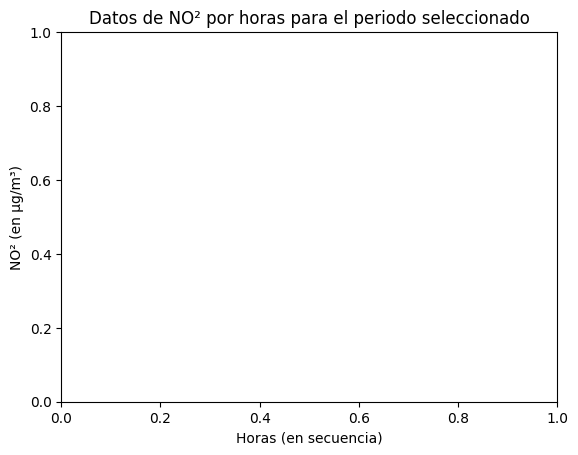

In [60]:
from itertools import accumulate
import matplotlib.pyplot as plt

# Visualizamos datos de salida
range_data = range(len(datos_estacion))
plt.title('Datos de NO² por horas para el periodo seleccionado')
plt.xlabel('Horas (en secuencia)')
plt.ylabel('NO² (en µg/m³)')

month_marks = list(map(lambda x: x * 24, accumulate(days_month, lambda x, y: (x+y))))
plt.plot(range_data, datos_estacion)
for mark in month_marks:
    plt.axvline(x=mark, color='r', linestyle='--')

In [ ]:
datos_estacion = np.reshape(datos_estacion, (datos_estacion.shape[0], 1))

In [ ]:
for estacion in estaciones[1:]:
    aux = data[data['estacion'] == estacion]['NO2'].values
    aux = np.reshape(aux, (aux.shape[0], 1))
    datos_estacion = np.concatenate((datos_estacion, aux), axis=-1)

In [ ]:
fig, axs = plt.subplots(2, 1)

#ax = fig.add_subplot(111)
#plt.title('Datos de NO² por horas para el periodo seleccionado')
#plt.xlabel('Horas (en secuencia)')
#plt.ylabel('NO² (en µg/m³)')

axs[0].plot(range_data, datos_estacion[:,0])
for mark in month_marks:
    axs[0].axvline(x=mark, color='r', linestyle='--')
axs[1].plot(range_data, datos_estacion[:,1])
for mark in month_marks:
    axs[1].axvline(x=mark, color='r', linestyle='--')